In [1]:
# AIM OF THE PROJECT

## 1. The main aim of the project is to predict whether the person has breast cancer or not.
## This is done by using a simple artificial neural networks.

In [2]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the dataset
data = pd.read_csv('/content/data.csv')

In [4]:
# print the data
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [5]:
# To get the first five rows of the dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [6]:
# To get the last five rows of the dataset
print(data.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_w

In [7]:
# To get the shape of the dataset
print(data.shape)

(569, 32)


In [8]:
# To check if there are any NULL Values in the dataset
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [9]:
# From the above observation, it is clear that there are no NULL Values in the dataset

<Axes: >

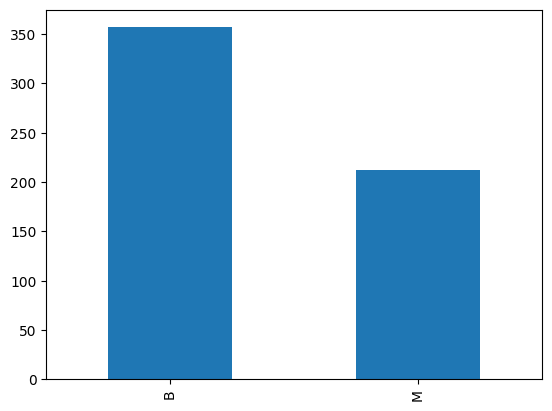

In [11]:
# To perform the statistical summary for the cancer dataset
data['diagnosis'].value_counts().plot(kind = 'bar')

In [12]:
# From the above observation, it is clear that more number of patients have benign cancer than the malignant cancers.

In [17]:
# Divide the dataset into independent and dependent variables
X = data.drop(columns = ['id','diagnosis'])
print(X)


Y = data['diagnosis']
print(Y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [20]:
# Transform the output categorical data into its label form
from sklearn.preprocessing import LabelEncoder

# create the object for label encoder
lb = LabelEncoder()

# Transform the output into its label form
Y = lb.fit_transform(Y)

In [22]:
# Binary form of the Output
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [23]:
# Divide the independent and dependent variables into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [25]:
# But in the dataset, we see that all the inputs are of various different ranges, to bring all the inputs in one range, we need to perform feature scaling
from sklearn.preprocessing import  StandardScaler

# create the object for Standard Scaler
sc = StandardScaler()

# tarnsform all the inputs in one range using Standard Scaler
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [28]:
# import all the libraries for Artificial Neural Networks Model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Construct an ANN Model

# create an object for ARTIFICIAL NEURAL NETWORKS
annmodel = Sequential()

# Add the first input and Dense layer into the ANN Model
annmodel.add(Dense(16, activation = 'relu',input_dim = 30))

# Add the second dense layer into the ANN Model
annmodel.add(Dense(16, activation = 'relu'))

# Add the output layer
annmodel.add(Dense(1, activation = 'sigmoid'))

In [31]:
# Compile the ANN Model
annmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
# Train the ANN Model
annmodel.fit(X_train, Y_train, batch_size = 100 , epochs = 150)

Epoch 1/150
5/5 [==============================] - 1s 7ms/step - loss: 0.5549 - accuracy: 0.7978
Epoch 2/150
5/5 [==============================] - 0s 7ms/step - loss: 0.4911 - accuracy: 0.8505
Epoch 3/150
5/5 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8835
Epoch 4/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3960 - accuracy: 0.8989
Epoch 5/150
5/5 [==============================] - 0s 7ms/step - loss: 0.3568 - accuracy: 0.9143
Epoch 6/150
5/5 [==============================] - 0s 5ms/step - loss: 0.3227 - accuracy: 0.9253
Epoch 7/150
5/5 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.9385
Epoch 8/150
5/5 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.9451
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.9473
Epoch 10/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2228 - accuracy: 0.9516
Epoch 11/150
5/5 [===========

In [33]:
# BEST TRAINING ACCURACY
_, results = annmodel.evaluate(X_train, Y_train)
print("Accuracy is:", (results * 100.0))

15/15 [==============================] - 1s 7ms/step - loss: 0.0151 - accuracy: 0.9934
Accuracy is: 99.3406593799591


In [34]:
# To get the predicted output
Y_pred_test = annmodel.predict(X_test)
print(Y_pred_test)

4/4 [==============================] - 0s 4ms/step
[[9.99996603e-01]
 [6.72432929e-02]
 [2.36768188e-04]
 [1.39729269e-02]
 [9.40356258e-05]
 [6.07629627e-05]
 [2.41754310e-06]
 [4.33329187e-05]
 [3.10652717e-06]
 [2.94609421e-08]
 [1.54368393e-02]
 [2.57024989e-02]
 [2.74040099e-06]
 [2.51041383e-01]
 [1.69883683e-01]
 [9.99987304e-01]
 [6.06998052e-09]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999225e-01]
 [9.99899447e-01]
 [2.25903466e-03]
 [4.08141583e-04]
 [9.99999881e-01]
 [9.33354968e-05]
 [3.21582093e-06]
 [9.99543548e-01]
 [3.60278907e-04]
 [1.00000000e+00]
 [3.46447268e-05]
 [9.99999762e-01]
 [1.62656698e-02]
 [9.99995589e-01]
 [1.23400845e-08]
 [9.99983728e-01]
 [1.28736151e-02]
 [9.99999166e-01]
 [9.24092834e-04]
 [9.99986887e-01]
 [9.75926042e-01]
 [3.10582891e-07]
 [9.87396836e-01]
 [3.93267783e-06]
 [2.27854223e-04]
 [1.00000000e+00]
 [2.73682765e-08]
 [2.50456352e-02]
 [1.22970960e-05]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99040127e-01]
 [1.00000000e

In [39]:
# To depict the result in binary form
Y_pred_test = (Y_pred_test > 0.5)
print(Y_pred_test)

[ True False False False False False False False False False False False
 False False False  True False  True  True  True  True  True False False
  True False False  True False  True False  True False  True False  True
 False  True False  True  True False  True False False  True False False
 False  True  True  True  True False False False False False False  True
  True  True False False  True False  True  True  True False False  True
 False  True  True False False False False False  True  True  True False
  True False False False  True  True False  True False  True False False
  True False False False False False False False  True False  True False
  True  True False  True  True False]


In [43]:
# Get the accuracy score between the actual output and the predicted output
from sklearn.metrics import accuracy_score
print("Accracy score of the model is:", accuracy_score(Y_test, Y_pred_test)*100.0)

Accracy score of the model is: 100.0


In [44]:
# CONFUSION MATRIX BETWEEN ACTUAL OUTPUT AND PREDICTED OUTPUT
from sklearn.metrics  import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_test)

print(cm)

[[67  0]
 [ 0 47]]


<Axes: >

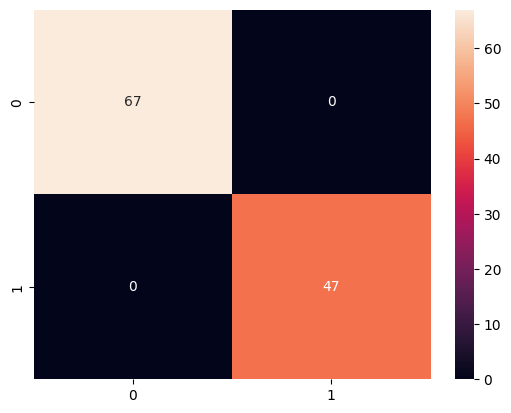

In [45]:
# To display the confusion matrix graphically
import seaborn as sns
sns.heatmap(cm, annot = True)